#### Week 2: Cleaning and Model Start

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_excel('data/Transaction_Data_20210128.xlsx', sheet_name = '36 Rolling Months', header=1, usecols="B:AN")

In [4]:
df = pd.read_pickle('data/sheet.pkl')

In [5]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,85102111664960504040,3096,6592,302,157,8,13,7,7,2,...,0.0,0.0,0.0,0.0,0.0,8.431248e+06,1.066578e+07,0.0,0.0,2017-12-31
1,4492101,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.468574e+04,0.000000e+00,0.0,0.0,2017-12-31
2,85102140943881291064,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-7.164047e+04,0.000000e+00,0.0,0.0,2017-12-31
3,85202121774856516280,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,3.425462e+05,0.000000e+00,0.0,0.0,2017-12-31
4,0360380,7,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,-1.315423e+05,-9.472989e+04,0.0,0.0,2017-12-31


In [6]:
sample = df[df['CONTACT_ID'] == '85102140943881291064'].copy()

In [7]:
sample['year'] = sample['refresh_date'].dt.year
sample['month'] = sample['refresh_date'].dt.month

In [8]:
#sample = sample[sample['year'] != 2017]

In [9]:
sample.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date', 'year',
       'month'],
      dtype='object')

In [10]:
#sample[['sales_curr', 'sales_12M', 'year', 'month']]

In [11]:
sample.set_index('refresh_date', inplace = True)

In [12]:
df['year'] = df['refresh_date'].dt.year

In [13]:
one_manager = sample[(sample['year'].isin([2017, 2018]))].iloc[:-1]

In [14]:
one_manager.sum(numeric_only=True)

no_of_sales_12M_1                           0.000000
no_of_Redemption_12M_1                     34.000000
no_of_sales_12M_10K                         0.000000
no_of_Redemption_12M_10K                    0.000000
no_of_funds_sold_12M_1                      0.000000
no_of_funds_redeemed_12M_1                 12.000000
no_of_fund_sales_12M_10K                    0.000000
no_of_funds_Redemption_12M_10K              0.000000
no_of_assetclass_sold_12M_1                 0.000000
no_of_assetclass_redeemed_12M_1            12.000000
no_of_assetclass_sales_12M_10K              0.000000
no_of_assetclass_Redemption_12M_10K         0.000000
No_of_fund_curr                             0.000000
No_of_asset_curr                            0.000000
AUM                                   -863075.690000
sales_curr                                  0.000000
sales_12M                                   0.000000
redemption_curr                          -587.510000
redemption_12M                          -4947.

In [15]:
df['CONTACT_ID'] = df['CONTACT_ID'].astype('str')

In [16]:
manager_groups = df.groupby('CONTACT_ID')

In [17]:
dfs = []

for manager in manager_groups:
    #print(manager[1])
    #dfs.append(manager[1].loc[(manager[1]['year'].isin([2017, 2018]))].iloc[:-1])
    sub = manager[1].loc[(manager[1]['year'].isin([2017, 2018]))].iloc[:-1].sum()
    dfs.append(sub)

    

In [18]:
agg_dfs = pd.concat(dfs, axis = 1)

In [19]:
agg_df = agg_dfs.T

In [20]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10010 entries, 0 to 10009
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   CONTACT_ID                           10010 non-null  object
 1   no_of_sales_12M_1                    10010 non-null  object
 2   no_of_Redemption_12M_1               10010 non-null  object
 3   no_of_sales_12M_10K                  10010 non-null  object
 4   no_of_Redemption_12M_10K             10010 non-null  object
 5   no_of_funds_sold_12M_1               10010 non-null  object
 6   no_of_funds_redeemed_12M_1           10010 non-null  object
 7   no_of_fund_sales_12M_10K             10010 non-null  object
 8   no_of_funds_Redemption_12M_10K       10010 non-null  object
 9   no_of_assetclass_sold_12M_1          10010 non-null  object
 10  no_of_assetclass_redeemed_12M_1      10010 non-null  object
 11  no_of_assetclass_sales_12M_10K       1001

In [21]:
len(df['CONTACT_ID'].unique())

10010

In [22]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date,year
0,85102111664960504040,3096,6592,302,157,8,13,7,7,2,...,0.0,0.0,0.0,0.0,8.431248e+06,1.066578e+07,0.0,0.0,2017-12-31,2017
1,4492101,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,-1.468574e+04,0.000000e+00,0.0,0.0,2017-12-31,2017
2,85102140943881291064,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,-7.164047e+04,0.000000e+00,0.0,0.0,2017-12-31,2017
3,85202121774856516280,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,3.425462e+05,0.000000e+00,0.0,0.0,2017-12-31,2017
4,0360380,7,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,-1.315423e+05,-9.472989e+04,0.0,0.0,2017-12-31,2017


In [23]:
y = df[df['year'] == 2020].groupby('CONTACT_ID')[['sales_12M']].max()

In [24]:
X = agg_df.drop(['CONTACT_ID', 'year'], axis = 1)

In [44]:
agg_df.to_csv('aggregated_sample.csv', index = False)

In [25]:
import seaborn as sns

In [26]:
#sns.pairplot(X['no_of_Redemption_12M_1', 'no_of_sales_12M_1','AUM', 'sales_curr', 'sales_12M'])

In [27]:
# X.info()

### Modeling Start

In [28]:
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [30]:
rfe = RFE(LinearRegression())

In [31]:
rfe.fit_transform(X, y).shape

(10010, 18)

In [32]:
X.shape

(10010, 37)

#### Pipeline

In [33]:
pipe_1 = make_pipeline(rfe, LinearRegression())

In [34]:
pipe_1.fit(X, y)

Pipeline(steps=[('rfe', RFE(estimator=LinearRegression())),
                ('linearregression', LinearRegression())])

In [35]:
pipe_1.score(X, y)

0.32509869549842707

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
pipe_1.fit(X_train, y_train)

Pipeline(steps=[('rfe', RFE(estimator=LinearRegression())),
                ('linearregression', LinearRegression())])

In [38]:
pipe_1.score(X_train, y_train)

0.3275545286196454

In [39]:
pipe_1.score(X_test, y_test)

-61781.57016766354

### Searching Feature Selectors

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfe_tree = RFE(RandomForestRegressor())

In [42]:
pipe_2 = make_pipeline(rfe_tree, LinearRegression())

In [43]:
rfe_tree.fit(X_train, y_train)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/sklearn/feature_s

KeyboardInterrupt: 

In [ ]:
rfe_tree.score(X_train, y_train)

In [ ]:
rfe_tree.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_pipe = make_pipeline(RFE(Lasso()), LinearRegression())

In [ ]:
lasso_pipe.fit(X_train, y_train)

In [ ]:
lasso_pipe.score(X_train, y_train)

In [ ]:
lasso_pipe.score(X_test, y_test)

In [ ]:
lasso_pipe['rfe'].support_

In [ ]:
X.columns

In [ ]:
def modeler(selector, model):
    pipe = make_pipeline([selector, model])
    pipe.fit(X_train, y_train)
    print(pipe.score(X_train, y_train))
    print(pipe.score(X_test, y_test))

In [104]:
select_pipe = make_pipeline(SelectFromModel(LinearRegression()), LinearRegression())

In [105]:
select_pipe.fit(X_train, y_train)

Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=LinearRegression())),
                ('linearregression', LinearRegression())])

In [106]:
select_pipe.score(X_train, y_train)

0.1780378889074481

In [107]:
select_pipe.score(X_test, y_test)

0.11360520727531687

#### Regularized models and ensembles

In [109]:
reg_pipe = make_pipeline(RFE(LinearRegression()), StandardScaler(), Ridge())

In [110]:
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('rfe', RFE(estimator=LinearRegression())),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [111]:
reg_pipe.score(X_train, y_train)

0.36535477438189523

In [112]:
reg_pipe.score(X_test, y_test)

0.21759411252376337

In [113]:
from sklearn.model_selection import GridSearchCV

In [130]:
params = {'ridge__alpha': [0.1, 1.0, 10, 100, 1000, 10_000]}

In [131]:
grid_reg = GridSearchCV(reg_pipe, param_grid=params)

In [132]:
grid_reg.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10, 100, 1000, 10000]})

In [133]:
grid_reg.score(X_train, y_train)

0.26275151900902927

In [134]:
grid_reg.score(X_test, y_test)

0.1911794703423566

In [135]:
grid_reg.best_params_

{'ridge__alpha': 10000}

### Transformers

In [136]:
from sklearn.preprocessing import PowerTransformer

In [137]:
pt_pipe = make_pipeline(PowerTransformer(), RFE(LinearRegression()), LinearRegression())

In [138]:
pt_pipe.fit(X_train, y_train)

Pipeline(steps=[('powertransformer', PowerTransformer()),
                ('rfe', RFE(estimator=LinearRegression())),
                ('linearregression', LinearRegression())])

In [139]:
pt_pipe.score(X_train, y_train)

0.31014300850522547

In [140]:
pt_pipe.score(X_test, y_test)

0.16849608754680412

In [141]:
import matplotlib.pyplot as plt

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

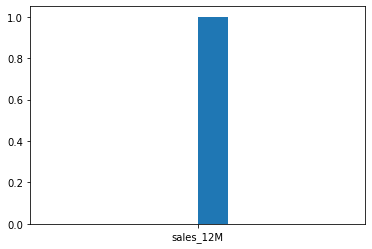

In [142]:
plt.hist(y)

array([[<AxesSubplot:title={'center':'sales_12M'}>]], dtype=object)

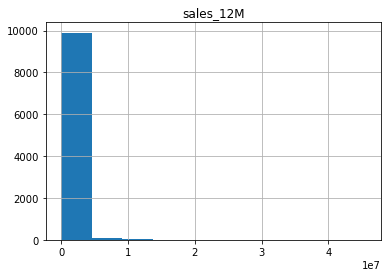

In [144]:
y.hist()

In [146]:
pt = PowerTransformer()

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 9.745e+03,
        2.540e+02, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([-49.17005514, -40.73125955, -32.29246396, -23.85366837,
        -15.41487278,  -6.97607719,   1.4627184 ,   9.901514  ,
         18.34030959,  26.77910518,  35.21790077]),
 <BarContainer object of 10 artists>)

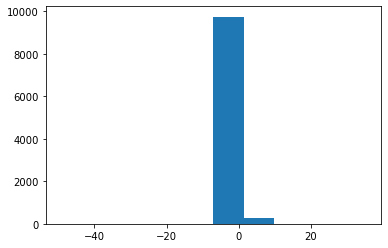

In [148]:
plt.hist(pt.fit_transform(X[['sales_12M']]))

In [149]:
from sklearn.compose import TransformedTargetRegressor

In [156]:
treg = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1)

In [157]:
treg.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression())

In [158]:
treg.score(X_train, y_train)

-42290.312637942436

In [159]:
treg.score(X_test, y_test)

-103277.44492107054

In [160]:
treg_pipe = make_pipeline(RFE(LinearRegression()), treg)

In [161]:
treg_pipe.fit(X_train, y_train)

Pipeline(steps=[('rfe', RFE(estimator=LinearRegression())),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [162]:
treg_pipe.score(X_train, y_train)

-10527539.330321416

In [163]:
treg_pipe.score(X_test, y_test)

-41858.80219349077